# Random Forest
Karlee Zammit - V00823093

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn import model_selection as md
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

## Functions

In [2]:
def random_forest_regression(X_tr, X_va, Y_tr, Y_va, n_est, max_d, min_samp, plot):
    
    reg =RandomForestRegressor(n_estimators=n_est, max_depth=max_d, min_samples_leaf=min_samp, 
                               bootstrap=True, criterion="squared_error")

    ## fitting step
    reg.fit(X_tr, Y_tr)

    ## predict for any data set. Here training and validation sets
    PY_tr =reg.predict(X_tr)
    PY_va =reg.predict(X_va)

    ## plotting the scatter plots and comparing them (i.e., tr and va sets)
    def mu_med_sig(pre,tar):
        mu = np.mean(pre-tar)
        med = np.median(pre-tar)
        std = np.std(pre-tar)
        return mu,med,std
    
    if plot == 1:

        fig,axarr = plt.subplots(1,2,figsize=(11,5))

        axarr[0].scatter(Y_tr,PY_tr,edgecolor='black',linewidths=2,facecolor=None)
        axarr[0].scatter(Y_tr,PY_tr,facecolor='C0',label='Training set')
        axarr[0].set_xlabel('Target')
        axarr[0].set_ylabel('Predicted')
        axarr[0].legend(loc=4)
        mu,med,sig = mu_med_sig(PY_tr,Y_tr)
        axarr[0].text(0.05,0.95,'$\mu$: %0.4f \nmedian: %0.4f \n$\sigma$: %0.4f'%(mu,med,sig),
                      ha='left',va='top',transform=axarr[0].transAxes)

        axarr[1].scatter(Y_va,PY_va,edgecolor='black',linewidths=2,facecolor=None)
        axarr[1].scatter(Y_va,PY_va,facecolor='C1',label='Validation set')
        axarr[1].set_xlabel('Target')
        axarr[1].set_ylabel('Predicted')
        axarr[1].legend(loc=4)
        mu,med,sig = mu_med_sig(PY_va,Y_va)
        axarr[1].text(0.05,0.95,'$\mu$: %0.4f \nmedian: %0.4f \n$\sigma$: %0.4f'%(mu,med,sig),
                      ha='left',va='top',transform=axarr[1].transAxes)
        
        #for ax in axarr:
            #xmin,xmax=-0.05,1.55
            #ax.set_xlim(xmin,xmax)
            #ax.set_ylim(xmin,xmax)
            #ax.plot([xmin,xmax],[xmin,xmax],color='black',ls='dashed',zorder=-1)

In [3]:
def random_forest_class(X_tr, X_va, Y_tr, Y_va, n_est, max_d, min_samp, plot):
    
    RFclass= RandomForestClassifier(n_estimators=n_est, criterion='entropy', max_depth=max_d, min_samples_leaf=min_samp, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0., bootstrap=True,
                                n_jobs=None, verbose=0)
    ## fitting the model:
    RFclass.fit(X_tr, Y_tr)

    ## predict the response for tr and va sets. We can have two outputs: probability (e.g.,PY_tr_prob ) and  the winner class (e.g.,PY_tr):
    PY_tr_prob = RFclass.predict_proba(X_tr)
    PY_tr = RFclass.predict(X_tr)

    PY_va_prob = RFclass.predict_proba(X_va)
    PY_va = RFclass.predict(X_va)

    ####---------------------------------------------------------------------- plotting for training set
    ####----------------------------------------------------------------------
    ####----------------------------------------------------------------------
    ## Plot the predicted distributions for the trainig set 

    if plot == 1:
        plt.figure(1)
        plt.hist(PY_tr_prob[0][Y_tr[:,0]==0,0],20,color = "blue",)
        plt.xlim([0,1])
        plt.legend(['Detections (TR)'])

        plt.figure(2)
        plt.hist(PY_tr_prob[0][Y_tr[:,0]==1,0],20,color = "red",)
        plt.xlim([0,1])
        plt.legend(['Non-detections (TR)'])

        ## ----------------------------------------------------------------------
        ## plot ROC  and estimate the are under the curve for the training set

        fpr = dict()
        tpr = dict()
        T=dict()
        roc_auc = dict()

        for i in range(2):
            tpr[i], fpr[i], T[i] = roc_curve(Y_tr[:, i], PY_tr_prob[0][:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure(3)

        cmap = cm.get_cmap("viridis",50)
        plt.scatter(fpr[1], tpr[1], c=T[1],cmap=cmap,vmin=0.,vmax=1)
        plt.colorbar()
        plt.plot([-0.2,1.2],[-0.2,1.2], '--k')
        plt.xlim([-.02,1.02])
        plt.ylim([-.02,1.02])

        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title('Area Under the Curve = %.3f' %roc_auc[0])

        ####----------------------------------------------------------------------plotting for validation set
        ####----------------------------------------------------------------------
        ####----------------------------------------------------------------------
        ## Plot the prediccted distributions for the validation set 

        plt.figure(6)
        plt.hist(PY_va_prob[0][Y_va[:,0]==0,0],20,color = "blue",)
        plt.xlim([0,1])
        plt.legend(['Detections (VA)'])

        plt.figure(7)
        plt.hist(PY_va_prob[0][Y_va[:,0]==1,0],20,color = "red",)
        plt.xlim([0,1])
        plt.legend(['Non-detections (VA)'])

        ## ----------------------------------------------------------------------
        ## plot ROC  and estimate the are under the curve for the validation set

        fpr = dict()
        tpr = dict()
        T=dict()
        roc_auc = dict()

        for i in range(2):
            tpr[i], fpr[i], T[i] = roc_curve(Y_va[:, i], PY_va_prob[0][:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure(8)
        cmap = cm.get_cmap("viridis",50)
        plt.scatter(fpr[1], tpr[1], c=T[1],cmap=cmap,vmin=0.,vmax=1)
        plt.colorbar()
        plt.plot([-0.2,1.2],[-0.2,1.2], '--k')
        plt.xlim([-.02,1.02])
        plt.ylim([-.02,1.02])

        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title('Area Under the Curve = %.3f' %roc_auc[0])
    

In [4]:
def split_data_regression(X,Y):
    # Split the input and target data into test and train, with 75% of the data going to training, and 25% of the data going to testing
    X_tr, X_va, Y_tr, Y_va = train_test_split(X,Y.values.ravel(),test_size=0.25)

    # Print the shape of the split data
    print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))
    
    # Normalize the data, as was done in Q2
    scaler_S= StandardScaler().fit(X_tr)  # line #2
    X_tr_Norm= scaler_S.transform(X_tr) # line # 3
    X_va_Norm= scaler_S.transform(X_va)  # Line #4
    
    n_column = 2

    # Plot a figure of the normalized training and validation set to ensure they represent the same distribution and spread
    
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(X_tr_Norm[:,n_column])
    plt.title('Training set')
    plt.ylabel('N')
    plt.xlabel("X"+str(n_column))

    plt.subplot(1, 2, 2)
    plt.hist(X_va_Norm[:,n_column])
    plt.title('Validation set')
    plt.ylabel('N')
    plt.xlabel("X"+str(n_column))
    
    return X_tr_Norm, X_va_Norm, Y_tr, Y_va

## Sachs Harbour Dataset

In [5]:
# Load in the data csv and print it's shape
df_SH = pd.read_excel('Ambient Sound Data Sachs Harbour 2015-2016.xlsx')
print(df_SH.shape)

# Count the existing nans
nan_count = df_SH.isna().sum().sum()
print(nan_count)

# Drop non necessary columns 
df_SH = df_SH.drop(['Deployment', 'Ice', 'DateTime'], axis=1)

# Double check there are no nans 
df_SH=df_SH.dropna(axis=0)

# Plot a histogram of the data
#df_SH.hist(figsize=(14, 12), bins=30, edgecolor="black")
print(df_SH.shape)

(9982, 23)
564
(9642, 20)


Index(['Year', 'Month', 'Day', 'Hour', '10-100Hz', '100-1000Hz', '1-10kHz',
       '10-24kHz', '250Hz', '50-1000Hz', 'Temperature', 'DewPt', 'RelHum',
       'WindDir', 'WindSp', 'Pressure', 'Ice6km2', 'Ice19km2', 'Ice31km2'],
      dtype='object')
Index(['Ice106km2'], dtype='object')
training set ==  (7231, 19) (7231,) ,, validation set ==  (2411, 19) (2411,)


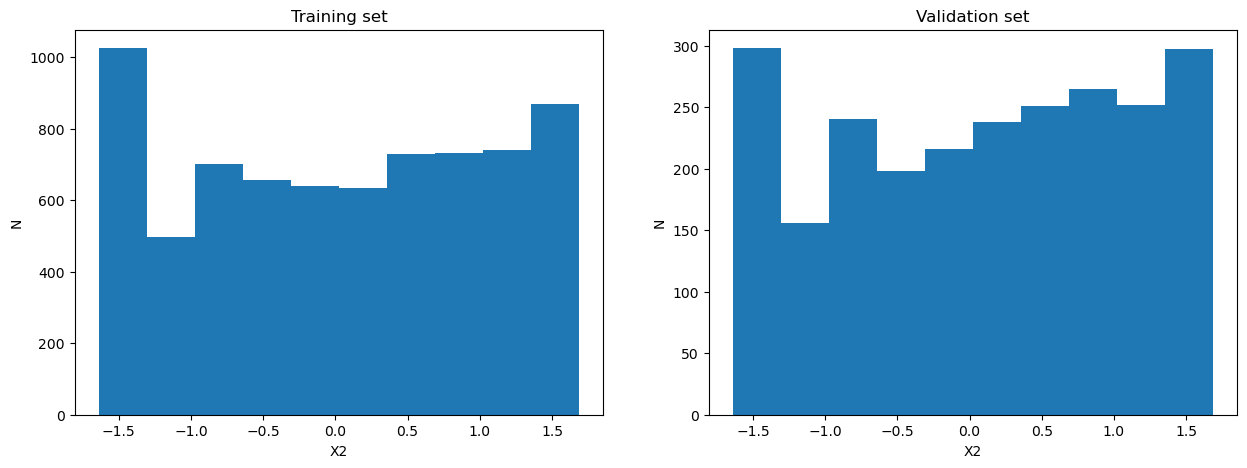

In [6]:
# Set temperature as the target variable
var = ['Ice106km2']

# Drop temperature out of the weather data, and set it as X
X = df_SH.loc[:,df_SH.columns.drop(var)]
print(X.columns)

# Set the target (Y) to be temperature
Y = df_SH[var].copy()
print(Y.columns)

# Call the split data function
X_tr_Norm, X_va_Norm, Y_tr, Y_va = split_data_regression(X,Y)

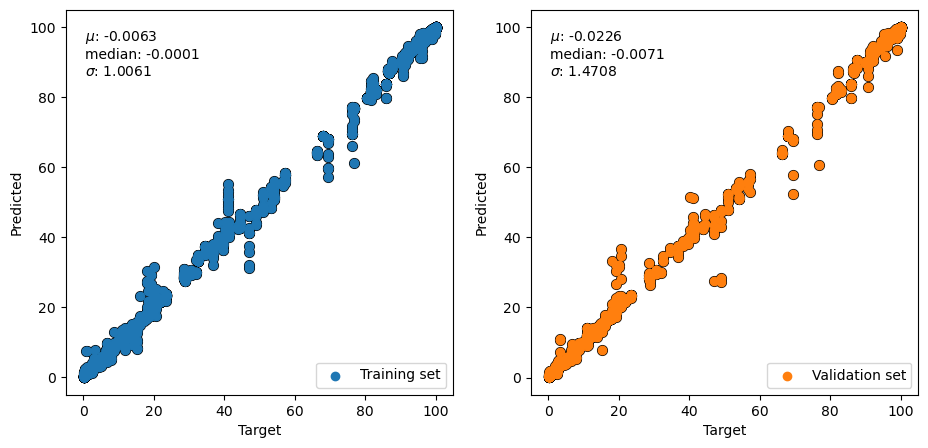

In [7]:
random_forest_regression(X_tr_Norm, X_va_Norm, Y_tr, Y_va, n_est = 50, max_d = 100, min_samp = 10, plot=1)

# Classification Datasets

## Forest Cover

In [8]:
## Forest Cover
covtype = pd.read_csv('covtype.csv')
print(covtype.shape)
print(covtype.columns)

# "class" column as numpy array.
y = covtype["Cover_Type"].values
print(type(y))

# All data except "class" column.
x = covtype.drop(["Cover_Type"], axis=1).values
print(x.shape)

ohe = OneHotEncoder(sparse=False)
tar= np.reshape(y,(-1,1))
tar = ohe.fit_transform(tar)

# Split data for train and test.
X_tr, X_va, Y_tr, Y_va = train_test_split(x, tar, test_size=0.25)

print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))
    
scaler_S= StandardScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3
X_va_Norm= scaler_S.transform(X_va)  # Line #4

(581012, 55)
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39',

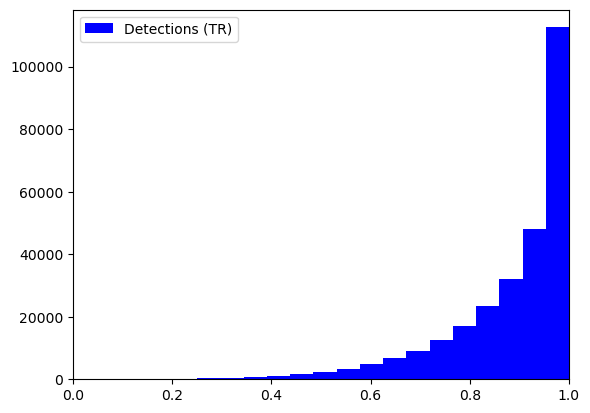

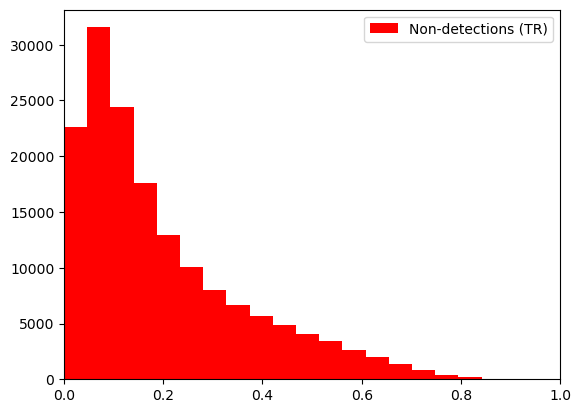

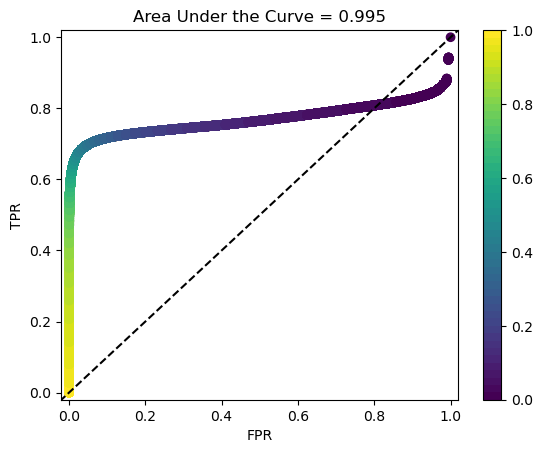

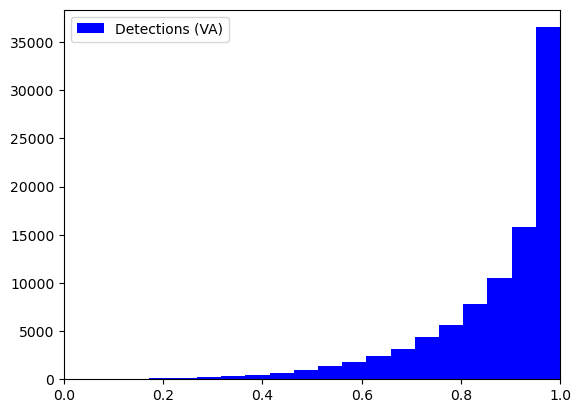

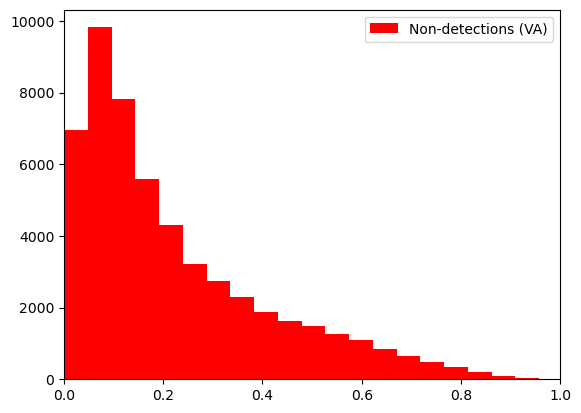

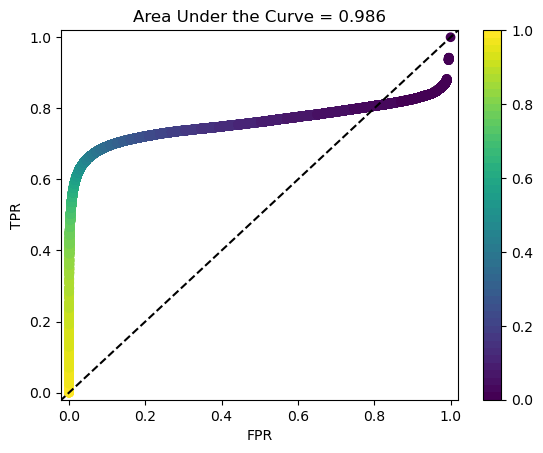

In [9]:
random_forest_class(X_tr, X_va, Y_tr, Y_va, n_est=50, max_d=50, min_samp=10, plot=1)

In [10]:
import yellowbrick.classifier 
import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'functional', 
                                        1: 'needs repair', 
                                        2: 'nonfunctional'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

ModuleNotFoundError: No module named 'yellowbrick'

## Mushrooms

https://archive.ics.uci.edu/ml/datasets/Secondary+Mushroom+Dataset

In [ ]:
# Load in data and clean 
df_mushies = pd.read_csv('secondary_data.csv', delimiter=';')
print(df_mushies.shape)
nan_count = df_mushies.isna().sum().sum()
print(nan_count)
print(df_mushies.shape)
df_mushies = df_mushies.dropna(axis=1, how='any')
nan_count = df_mushies.isna().sum().sum()
print(nan_count)
print(df_mushies.shape)

In [ ]:
# This data is categorical 
df_mushies = df_mushies.astype('category')
print(df_mushies)

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df_mushies.columns:
    df_mushies[column] = labelencoder.fit_transform(df_mushies[column])

df_mushies.head()

In [ ]:
# "class" column as numpy array.
y = df_mushies["class"].values
print(type(y))

# All data except "class" column.
x = df_mushies.drop(["class"], axis=1).values
print(x.shape)

ohe = OneHotEncoder(sparse=False)
tar= np.reshape(y,(-1,1))
tar = ohe.fit_transform(tar)

# Split data for train and test.
X_tr, X_va, Y_tr, Y_va = train_test_split(x, tar, test_size=0.25)

print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))
    
scaler_S= StandardScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3
X_va_Norm= scaler_S.transform(X_va)  # Line #4

In [ ]:
random_forest_class(X_tr, X_va, Y_tr, Y_va, n_est=100, max_d=25, min_samp=40, plot=1)

## Houston Weather (Classification)

Below is data visualization for the Houston weather dataset. The classification output would be a binary classification of "rain" or "no rain" for a given input example. I decided to include this, as it is a very good example of unbalanced data: there are many more non-rainy days than rainy days, and so before this data is used for classification, it will need to be balanced through a exercise such as bootstrapping.

In [ ]:
# Load in csv data
htx_2006 = pd.read_csv('htx_2006_weather.csv')
print(htx_2006.shape)
htx_2010 = pd.read_csv('htx_2010_weather.csv')
print(htx_2010.shape)
htx_2011 = pd.read_csv('htx_2011_weather.csv')
print(htx_2011.shape)
htx_2012 = pd.read_csv('htx_2012_weather.csv')
print(htx_2012.shape)
htx_2013 = pd.read_csv('htx_2013_weather.csv')
htx_2014 = pd.read_csv('htx_2014_weather.csv')
htx_2015 = pd.read_csv('htx_2015_weather.csv')
htx_2018 = pd.read_csv('htx_2018_weather.csv')
htx_2019 = pd.read_csv('htx_2019_weather.csv')
htx_2021 = pd.read_csv('htx_2021_weather.csv')

# Append the first two together
htx = htx_2006.append(htx_2010)
print(htx.shape)

# Make a list of the rest of the years 
years = [htx_2011, htx_2012, htx_2013, htx_2014, htx_2015, htx_2018, htx_2019, htx_2021]

# Loop through all of the years and append them 
for year in years: 
    htx = htx.append(year)
    
print(htx.shape)

# Drop nans from the data by row
htx=htx.dropna(axis=0)
print(htx.shape)
print(htx.columns)

#htx.hist(figsize=(10, 8), bins=30, edgecolor="black")
#plt.subplots_adjust(hspace=0.7, wspace=0.4)

print(htx)

# Determine columns that are not numeric 
result = htx.applymap(np.isreal)

# Replace 'Blank's with nans
htx = htx.replace('Blank', np.nan)

# And then remove the rows containing these nans
htx=htx.dropna(axis=0)
print(htx.shape)

# Change strings to floats where applicable
htx['wind_speed9am'] = pd.to_numeric(htx['wind_speed9am'])
htx['wind_speed3pm'] = pd.to_numeric(htx['wind_speed3pm'])
htx['humidity9am'] = pd.to_numeric(htx['humidity9am'])
htx['humidity3pm'] = pd.to_numeric(htx['humidity3pm'])
htx['pressure9am'] = pd.to_numeric(htx['pressure9am'])
htx['pressure3pm'] = pd.to_numeric(htx['pressure3pm'])
htx['temp9am'] = pd.to_numeric(htx['temp9am'])
htx['temp3pm'] = pd.to_numeric(htx['temp3pm'])

# Plot a histogram of the data
htx.hist(figsize=(10, 8), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# Drop non-numeric columns
htx = htx.drop(['date', 'cloud9am', 'cloud3pm', 'rain_today', 'rain_tomorrow'], axis=1)
htx.columns

In [ ]:
# Create a new column called "rain", and set to 1 if the rainfall
# was larger than 0, and 0 if it did not ran. 
htx.loc[htx['rainfall'] > 0.0, 'rain'] = 1
htx.loc[htx['rainfall'] <= 0.0, 'rain'] = 0
print(htx)

# See how many days it rained on 
sum(htx['rain'])

# Plot a histogram of the rainy vs non-rainy day to see if the data 
# is balanced
htx['rain'].hist()

# "class" column as numpy array.
y = htx["rain"].values
print(type(y))

# All data except "class" column.
x = htx.drop(["rain"], axis=1).values
print(x.shape)

In [ ]:
ohe = OneHotEncoder(sparse=False)
tar= np.reshape(y,(-1,1))
tar = ohe.fit_transform(tar)

# Split data for train and test.
X_tr, X_va, Y_tr, Y_va = train_test_split(x, tar, test_size=0.25)

print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))
    
scaler_S= StandardScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3
X_va_Norm= scaler_S.transform(X_va)  # Line #4

In [ ]:
random_forest_class(X_tr, X_va, Y_tr, Y_va, n_est=50, max_d=5, min_samp=10, plot=1)

# References



Bishop, C. M. (2006). Pattern recognition and machine learning. In Pattern recognition and machine learning. Springer.

**Datasets:**

Insley, S. J., Halliday, W. D., & de Jong, T. (2017). Seasonal Patterns in Ocean Ambient Noise near Sachs Harbour, Northwest Territories. Arctic, 70(3), 239–248. https://doi.org/10.14430/arctic4662

https://www.kaggle.com/datasets/alejandrochapa/houston-weather-data

https://archive.ics.uci.edu/ml/datasets/Secondary+Mushroom+Dataset

https://bg.copernicus.org/articles/10/5793/2013/ (Weather one I haven't tried) 

https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset
